In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/content/drive/MyDrive/YBI/Internship Projects - 2/power consumption.csv')
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               52416 non-null  object 
 1   Temperature            52416 non-null  float64
 2   Humidity               52416 non-null  float64
 3   Wind Speed             52416 non-null  float64
 4   general diffuse flows  52416 non-null  float64
 5   diffuse flows          52416 non-null  float64
 6   Zone 1                 52416 non-null  float64
 7   Zone 2                 52416 non-null  float64
 8   Zone 3                 52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [5]:
# Check data types
display(data.dtypes)

,0
DateTime,object
Temperature,float64
Humidity,float64
Wind Speed,float64
general diffuse flows,float64
diffuse flows,float64
Zone 1,float64
Zone 2,float64
Zone 3,float64


In [6]:
# Attempt to convert 'DateTime' to datetime, handling inconsistent formats
try:
    data['DateTime'] = pd.to_datetime(data['DateTime'], errors='coerce', dayfirst=False)
except Exception as e:
    display(f"Error during conversion: {e}")

# Check for rows where conversion failed
failed_conversions = data[data['DateTime'].isna()]
if not failed_conversions.empty:
    display("Rows with invalid DateTime format:")
    display(failed_conversions)

# Drop rows with invalid DateTime values
data = data.dropna(subset=['DateTime'])

# Re-check and display the first few rows of the updated DateTime column
display(data['DateTime'].head())

'Rows with invalid DateTime format:'

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
1728,NaT,15.180,83.6,0.079,0.048,0.148,29401.51899,18284.49848,18413.49398
1729,NaT,15.170,83.7,0.080,0.073,0.122,28556.96203,17748.32827,18118.55422
1730,NaT,15.180,83.7,0.075,0.051,0.148,27639.49367,17412.76596,17661.68675
1731,NaT,15.200,83.9,0.076,0.062,0.141,26740.25316,16920.36474,16921.44578
1732,NaT,15.170,84.1,0.080,0.051,0.130,26661.26582,16562.91793,16701.68675
...,...,...,...,...,...,...,...,...,...
52411,NaT,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,NaT,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,NaT,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,NaT,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


,DateTime
0,2017-01-01 00:00:00
1,2017-01-01 00:10:00
2,2017-01-01 00:20:00
3,2017-01-01 00:30:00
4,2017-01-01 00:40:00


<Figure size 1200x1000 with 0 Axes>

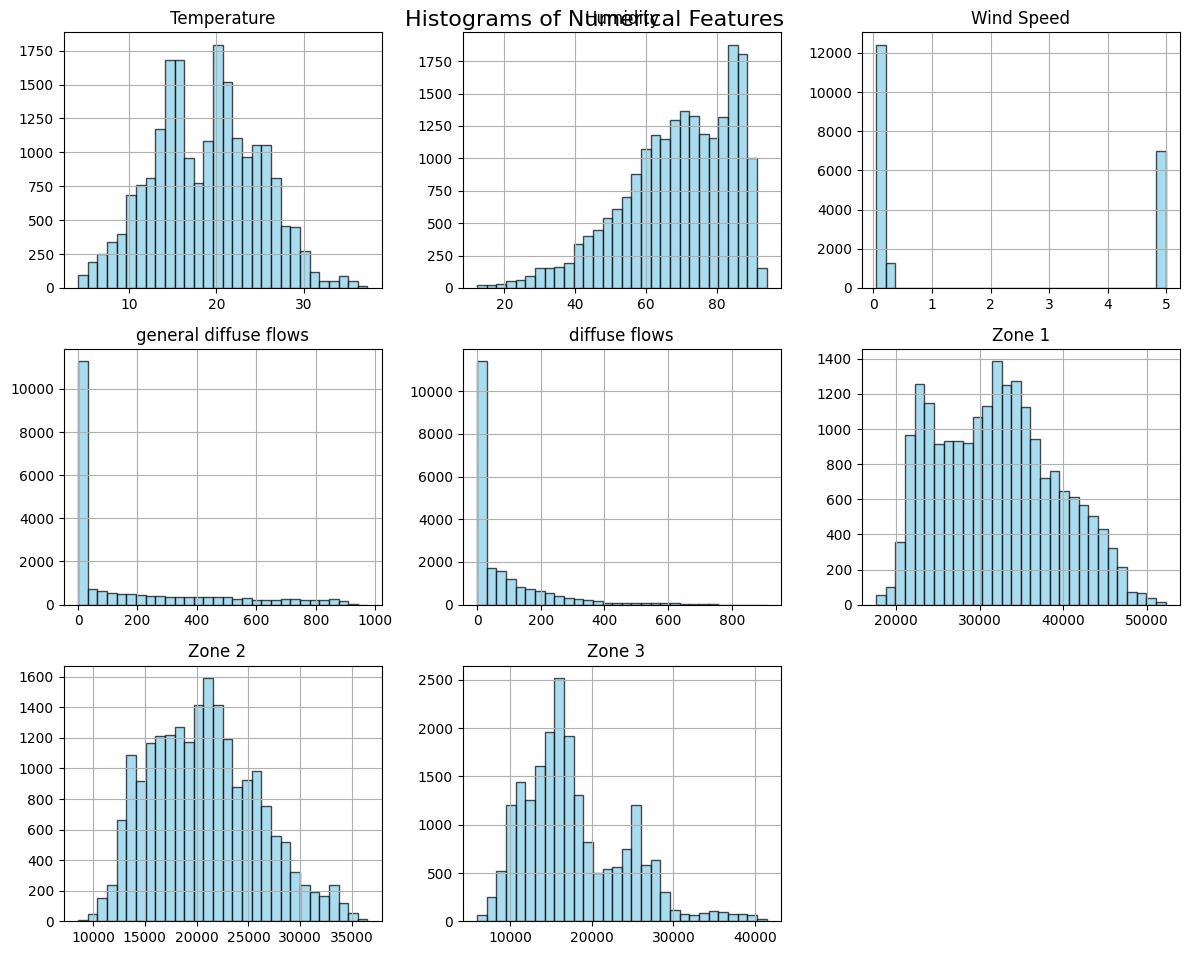

In [7]:
# Plot histograms for all numerical columns
plt.figure(figsize=(12, 10))
data.select_dtypes(include='number').hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.suptitle("Histograms of Numerical Features", fontsize=16, y=0.95)
plt.tight_layout()
plt.show()


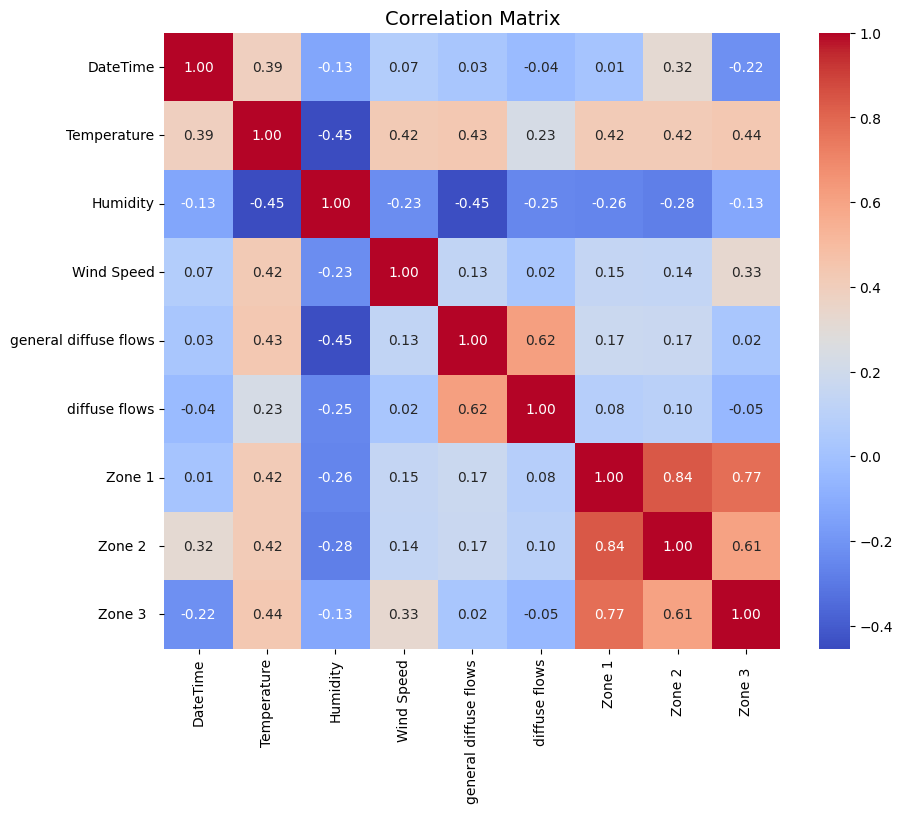

In [8]:
# Check correlations between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

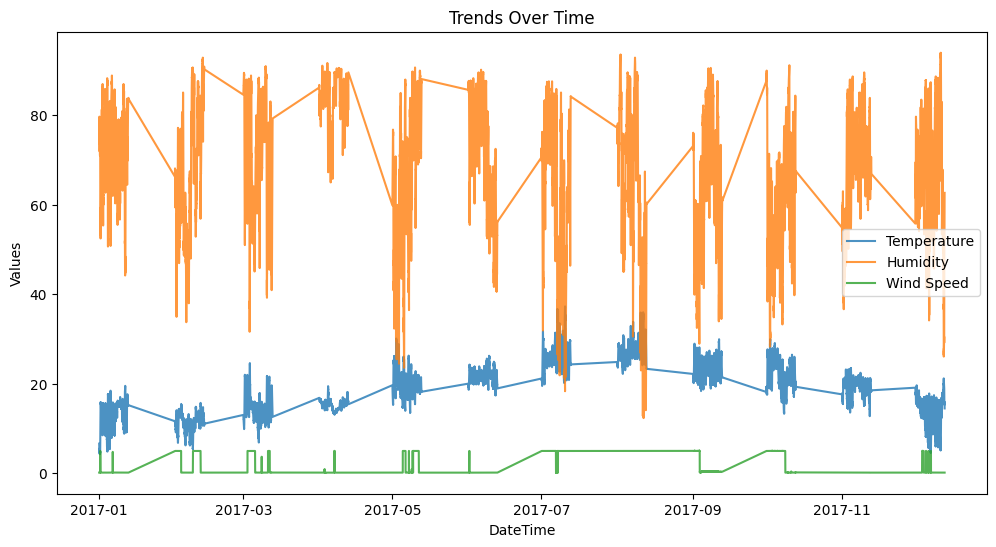

In [9]:
# Plot trends for temperature, humidity, and wind speed over time
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Temperature'], label='Temperature', alpha=0.8)
plt.plot(data['DateTime'], data['Humidity'], label='Humidity', alpha=0.8)
plt.plot(data['DateTime'], data['Wind Speed'], label='Wind Speed', alpha=0.8)
plt.legend()
plt.title('Trends Over Time')
plt.xlabel('DateTime')
plt.ylabel('Values')
plt.show()

In [10]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# Ensure DateTime is in datetime format and convert to numeric for plotting
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Timestamp'] = data['DateTime'].apply(lambda x: x.timestamp())

# 3D Scatter Plot
scatter_plot = go.Scatter3d(
    x=data['Timestamp'],
    y=data['general diffuse flows'],
    z=data['diffuse flows'],
    mode='markers',
    marker=dict(size=5, color=data['diffuse flows'], colorscale='Viridis', opacity=0.8),
    name='3D Scatter'
)

# 3D Line Plot for General Diffuse Flows
line_plot_general = go.Scatter3d(
    x=data['Timestamp'],
    y=data['general diffuse flows'],
    z=data['diffuse flows'],
    mode='lines',
    line=dict(color='blue', width=3),
    name='General Diffuse Flows'
)

# 3D Line Plot for Diffuse Flows
line_plot_diffuse = go.Scatter3d(
    x=data['Timestamp'],
    y=data['diffuse flows'],
    z=data['general diffuse flows'],
    mode='lines',
    line=dict(color='red', width=3),
    name='Diffuse Flows'
)

# Create the figure
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

# Add traces
fig.add_trace(scatter_plot)
fig.add_trace(line_plot_general)
fig.add_trace(line_plot_diffuse)

# Update layout for responsiveness
fig.update_layout(
    title='3D Visualization of Diffuse Flows Over Time',
    scene=dict(
        xaxis=dict(title='DateTime (Numeric Timestamp)'),
        yaxis=dict(title='General Diffuse Flows'),
        zaxis=dict(title='Diffuse Flows'),
    ),
    margin=dict(l=0, r=0, t=40, b=0),  # Minimal margins for responsiveness
    legend=dict(title='Legend', orientation="h", x=0.3, y=1.1),  # Horizontal legend
    scene_camera=dict(eye=dict(x=1.5, y=1.5, z=1))  # Initial camera position
)

# Show the interactive plot
fig.show()


In [18]:
# Detect anomalies in temperature
mean_temp = data['Temperature'].mean()
std_temp = data['Temperature'].std()

# Define an anomaly as being >3 standard deviations away
anomalies = data[(data['Temperature'] > mean_temp + 3 * std_temp) |
                 (data['Temperature'] < mean_temp - 3 * std_temp)]

display("\nTemperature Anomalies:")
display(anomalies)

'\nTemperature Anomalies:'

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3,Timestamp
27452,2017-07-10 15:20:00,37.01,19.81,4.914,780.0,69.66,39088.90365,27018.98734,27950.46025,1.499700e+09
27453,2017-07-10 15:30:00,36.88,19.24,4.918,764.0,68.57,38489.30233,26840.50633,27751.63180,1.499701e+09
27455,2017-07-10 15:50:00,37.26,21.11,4.914,723.0,68.66,38789.10299,26407.59494,27793.80753,1.499702e+09


In [19]:
zone_columns = [col for col in data.columns if 'Zone' in col]
print(f"Detected Zone Columns: {zone_columns}")

# Compute averages for detected zone columns
zone_avg = data[zone_columns].mean()
display("\nZone-Wise Averages:")
display(zone_avg)

Detected Zone Columns: ['Zone 1', 'Zone 2  ', 'Zone 3  ']


'\nZone-Wise Averages:'

,0
Zone 1,32086.712491
Zone 2,20747.253198
Zone 3,17781.417367


In [22]:
predictors = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']
targets = zone_columns
X = data[predictors]
y = data[targets]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Ridge Regression model
ridge_model = Ridge(alpha=0.001)  # You can tune the alpha value
ridge_model.fit(X_train, y_train)

# Predicting with the Ridge model
ridge_predictions = ridge_model.predict(X_test)

# Evaluating Ridge Regression
for i, zone in enumerate(targets):
    mse = mean_squared_error(y_test.iloc[:, i], ridge_predictions[:, i])
    r2 = r2_score(y_test.iloc[:, i], ridge_predictions[:, i])
    display(f"{zone} - Ridge Regression")
    display(f"Mean Squared Error: {mse:.2f}")
    display(f"R^2 Score: {r2:.2f}\n")

'Zone 1 - Ridge Regression'

'Mean Squared Error: 40864860.73'

'R^2 Score: 0.18\n'

'Zone 2   - Ridge Regression'

'Mean Squared Error: 22519707.86'

'R^2 Score: 0.19\n'

'Zone 3   - Ridge Regression'

'Mean Squared Error: 29601105.90'

'R^2 Score: 0.24\n'

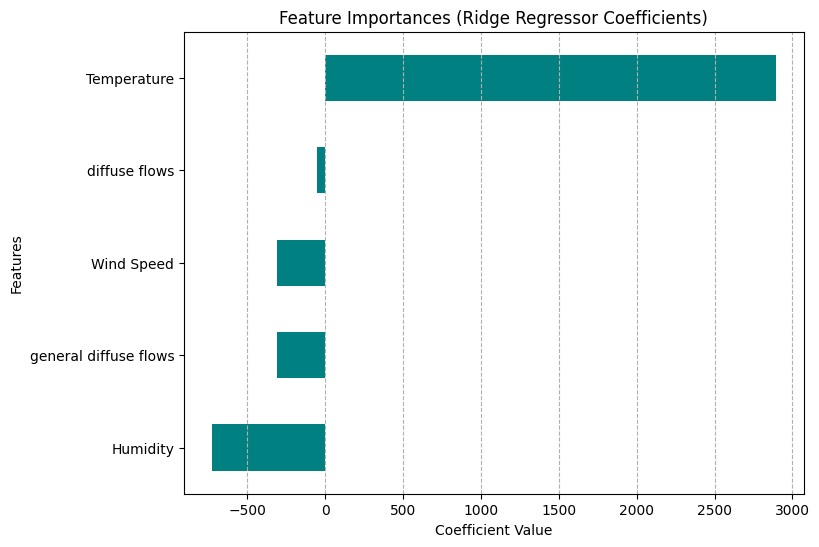

In [24]:
ridge_coefficients = pd.Series(ridge_model.coef_[0], index=X.columns)
plt.figure(figsize=(8, 6))
ridge_coefficients.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importances (Ridge Regressor Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--')
plt.show()
